# Inaugural Project

In [20]:
# Import relevant libraries
import numpy as np
 
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import optimize
import inauguralproject

#Import class for the model
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

# Set options for graphs
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 10})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To obtain the combination of the 9 cases, we do a for loop through the given values of alpha and sigma and optimize the objective function for each case. We also modify the H function in the class such that for diffent values of sigma it takes the respective functional forms. Then we obtain the ratios taking the results and doing the divisions. We create a DataFrame to visualize better the results and to be able to make comparisons. 

In [21]:
model = HouseholdSpecializationModelClass()

# Create lists for the values of the parameters
alphas = [0.25, 0.5, 0.75]
sigmas = [0.5, 1, 1.5]

# Create an empty DataFrame
results_df = pd.DataFrame(index=alphas, columns=sigmas)

# Loop through every value of alpha and sigma given
for alpha in alphas:
    for sigma in sigmas:

# Set parameters of the model to the specific value of the loop
     model.par.alpha = alpha
     model.par.sigma = sigma

# Call the method to solve the model discretely
     results_discrete = model.solve_discrete()
    
# Calculate the HF/HM ratio using the results from the optimization
     ratioH_discrete = results_discrete.HF/results_discrete.HM

# Print results
     print(f'alpha = {alpha:.2f} sigma = {sigma:.1f} -> ratio HF/HM = {ratioH_discrete:.4f}') 

# Add the HF/HM ratio to the DataFrame in the corrisponding position
     results_df.loc[alpha, sigma] = ratioH_discrete

# Print the DataFrame
print('')
print(results_df)

c:\Users\Lenovo\Desktop\GIT\projects-2023-virginia-rebecca\inauguralproject\HouseholdSpecializationModel.py:74: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma -1 )/par.sigma) + par.alpha*HF**((par.sigma -1 )/par.sigma))**(par.sigma/(par.sigma-1))


alpha = 0.25 sigma = 0.5 -> ratio HF/HM = 0.5455
alpha = 0.25 sigma = 1.0 -> ratio HF/HM = 0.3077
alpha = 0.25 sigma = 1.5 -> ratio HF/HM = 0.2143
alpha = 0.50 sigma = 0.5 -> ratio HF/HM = 1.0000
alpha = 0.50 sigma = 1.0 -> ratio HF/HM = 1.0000
alpha = 0.50 sigma = 1.5 -> ratio HF/HM = 1.0000
alpha = 0.75 sigma = 0.5 -> ratio HF/HM = 1.8333
alpha = 0.75 sigma = 1.0 -> ratio HF/HM = 3.2500
alpha = 0.75 sigma = 1.5 -> ratio HF/HM = 4.6667

           0.5       1.0       1.5
0.25  0.545455  0.307692  0.214286
0.50       1.0       1.0       1.0
0.75  1.833333      3.25  4.666667


As shown by the output printed, keeping sigma constant, as alpha increases, the HF/HM ratio increases monotonically.
Since alpha is the parameter for women productivity in home labour and sigma is elasticity of substitution between HF and HM, as the productivity of women in home labour increases, it is optimal for the household that women allocate more hours in home labour. 

# Question 2

To obtain the combination of the 5 cases, we do a for loop through the given values of wF, since wM is always assumed equal to 1. We then optimize the objective function with the discrete method for each case. Then we obtain the ratios taking the results and doing the divisions. We decided to do a scatter plot to better visualize the relation between HF/HM and wf/wM ratios.

log wF/wM ratio = -0.2231, correspondent log ratio HF/HM = 0.2231
log wF/wM ratio = -0.1054, correspondent log ratio HF/HM = 0.0000
log wF/wM ratio = 0.0000, correspondent log ratio HF/HM = 0.0000
log wF/wM ratio = 0.0953, correspondent log ratio HF/HM = -0.1178
log wF/wM ratio = 0.1823, correspondent log ratio HF/HM = -0.2231


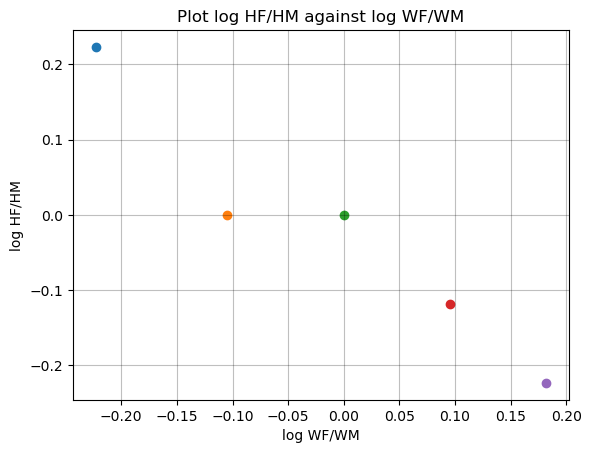

In [22]:
model2 = HouseholdSpecializationModelClass()

# Create the figure 

fig, ax = plt.subplots()

# Loop through the values of given wF 
for wF in [0.8, 0.9, 1, 1.1, 1.2]:

  # Set the parameter wF in the class to the corrispondent value of the loop
  model2.par.wF = wF

  # Solve the model discretely 
  results_discrete2= model2.solve_discrete()

  # Calculate the log of HF/HM ratio 
  ratioH_discrete2=np.log(results_discrete2.HF/results_discrete2.HM)
  

  # Calculate the log of wF/wM ratio
  ratioW=np.log(wF/model2.par.wM)
  

  # Print results
  print(f'log wF/wM ratio = {ratioW:.4f}, correspondent log ratio HF/HM = {ratioH_discrete2:.4f}') 
  
  # Create the scatter plot with the logs of the two ratios
  ax.scatter(ratioW, ratioH_discrete2)
  ax.set_title('Plot log HF/HM against log WF/WM')
  ax.set_xlabel('log WF/WM')
  ax.set_ylabel('log HF/HM');

From the graph we can notice that as the ratio between women’s salary and men’s salary (wF/wM) increases, the ratio between the number of hours of women’s domestic work and men’s one (HF/HM) decreases since it is optimal for women to allocate more hours to non-domestic work (L). 

# Question 3

As for Question 2, to obtain the combination of the 5 cases, we do a for loop through the given values of wF, since wM is always assumed equal to 1. We then optimize the objective function, but now with the continuous method for each case. Then we obtain the ratios taking the results and doing the divisions. We decided to do a scatter plot to better visualize the relation between HF/HM and wf/wM ratios.

log wF/wM ratio = -0.2231, correspondent log ratio HF/HM = 0.2231
log wF/wM ratio = -0.1054, correspondent log ratio HF/HM = 0.1053
log wF/wM ratio = 0.0000, correspondent log ratio HF/HM = -0.0000
log wF/wM ratio = 0.0953, correspondent log ratio HF/HM = -0.0953
log wF/wM ratio = 0.1823, correspondent log ratio HF/HM = -0.1823


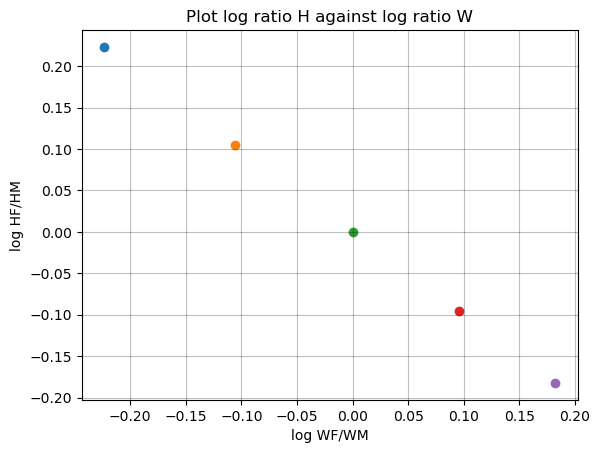

In [23]:
model3 = HouseholdSpecializationModelClass()

# Create the figure 
fig, ax = plt.subplots()

# Loop through the values of given wF
for wF in [0.8, 0.9, 1, 1.1, 1.2]:

  # Set the parameter wF in the class to the corrispondent value of the loop
  model3.par.wF = wF

  # Solve the model continuoisly calling the method solve from the class
  results_cont= model3.solve()
  
  # Calculate the log of HF/HM ratio
  ratioH_cont=np.log(results_cont.HF/results_cont.HM)
  
  
  # Calculate the log of wF/wM ratio
  ratioW_cont=np.log(wF/model3.par.wM)
  
  # Print results
  print(f'log wF/wM ratio = {ratioW_cont:.4f}, correspondent log ratio HF/HM = {ratioH_cont:.4f}') 

  # Create the scatter plot
  ax.scatter(ratioW_cont, ratioH_cont)
  ax.set_title('Plot log ratio H against log ratio W')
  ax.set_xlabel('log WF/WM')
  ax.set_ylabel('log HF/HM');

The results are similar to Question 2, even if not equal, but in general the decreasing pattern is confirmed. 

# Question 4

First of all we wrote a function that calculates directly the optimal HF and HM for the different values of wF, without the need to loop outside the function. Then we constructed the objective function in a way that it updates alpha and sigma, and then it calculates the estimated betas from the regression and consequently the function that we have to minimize. In the estimate function, the solver finds the alpha and sigma that minimize the objective function. 

In [24]:
model4 = HouseholdSpecializationModelClass()

# Estimate optimal alpha and sigma
optimal_parameters = model4.estimate()

model4.sol.beta0, model4.sol.beta1

optimal alpha = 0.9820
optimal sigma = 0.1000
optimal function = 0.000000000708828


(0.40002661706537135, -0.0999994001844979)

Text(0, 0.5, 'log HF/HM')

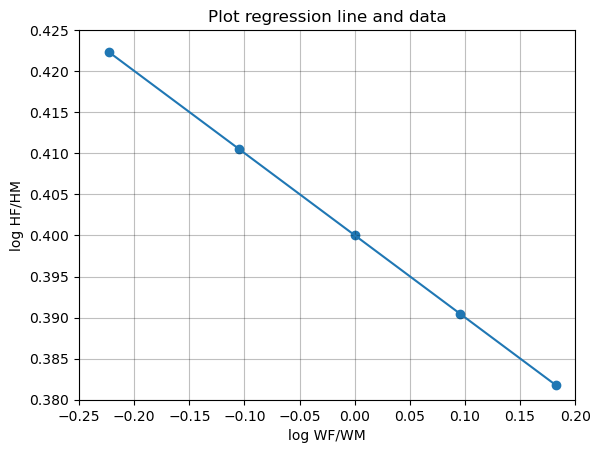

In [25]:
fig = plt.figure()
ax4 = fig.add_subplot(1,1,1)

# Plot data of log ratio W and log ratio H
xx = np.log(model4.par.wF_vec)
yy= np.log(model4.sol.HF_vec/model4.sol.HM_vec)
ax4.scatter(xx, yy)

# Plot regression line with parameters found above
reg = model4.sol.beta0 + model4.sol.beta1*xx
plt.plot(xx, reg)
plt.xlim(-0.25, 0.20)
plt.ylim(0.380, 0.425)
ax4.set_title('Plot regression line and data')
ax4.set_xlabel('log WF/WM')
ax4.set_ylabel('log HF/HM')

The value of the objective function at the optimal parameters is close to 0. The parameters of the regression found are close to the thoerical ones 0.4 and -0.1, In addition, the plot shows how the regression line with the parameters found fits the data. 

# Question 5

The model can be extented adding to the utility function the utility that the agents receive from domestic and non domestic work because it brings satisfaction or realization or because they like it.  Therefore we add a parameter that multiply HM that captures this utility: the utility function will be diminished less if the parameter is lower, meaning that they like the work. 

The utility function therefore becomes: $\frac{Q^{1 -\rho}}{1 - \rho} - \nu (\frac{T_{M} ^{1 + \frac{1}{\epsilon}}}{1 + \frac{1}{\epsilon}}+\frac{T_{F} ^{1 + \frac{1}{\epsilon}}} {1 + \frac{1}{\epsilon}} ) - \delta_{hm}*HM $ .

In [26]:
model5 = HouseholdSpecializationModelClass()

# Estimate optimal sigma
optimal_sigma = model5.estimate_addition()

model5.sol.beta0, model5.sol.beta1

optimal sigma = 0.1952
optimal deltahm = 0.0559
optimal function = 0.000000000101801


(0.40000909801518936, -0.10000436205942224)

Given alpha = 0.5, now the optimal sigma is higher than point 4. The minimized objective function has a lower value, so our new specification of the utility function improves the fit of the data.

Text(0, 0.5, 'log HF/HM')

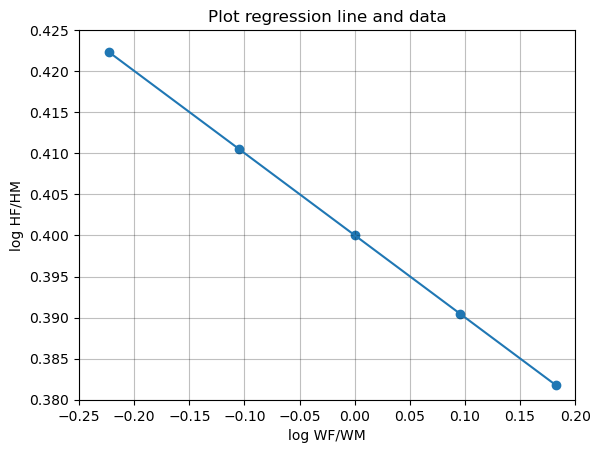

In [27]:
fig = plt.figure()
ax5 = fig.add_subplot(1,1,1)

# Plot data of log ratio W and log ratio H
xx = np.log(model4.par.wF_vec)
yy= np.log(model4.sol.HF_vec/model4.sol.HM_vec)
ax5.scatter(xx, yy)

# Plot regression line with parameters found above
reg2 = model5.sol.beta0 + model5.sol.beta1*xx
plt.plot(xx, reg)
plt.xlim(-0.25, 0.20)
plt.ylim(0.380, 0.425)
ax5.set_title('Plot regression line and data')
ax5.set_xlabel('log WF/WM')
ax5.set_ylabel('log HF/HM')